0.0
40.736923396798055


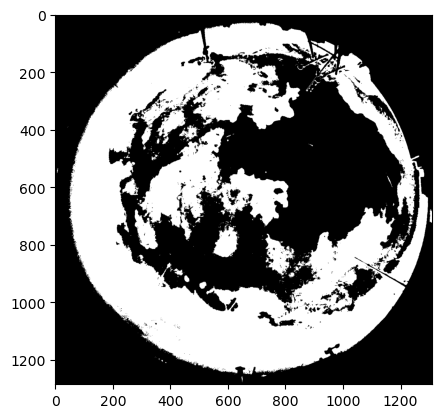

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./cloud_images/original/2021_11_26__13_15_00_crop.jpg')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])
mask_red = cv2.inRange(hsv, lower_red, upper_red)

lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

red_pixels = np.count_nonzero(mask_red)
blue_pixels = np.count_nonzero(mask_blue)
ratio = red_pixels / blue_pixels
print(ratio)
if ratio > 0.85:
    # Clouds are more red
    mask = mask_red
else:
    # Clouds are more blue
    mask = mask_blue

cloud_pixels = np.count_nonzero(mask)
total_pixels = mask.shape[0] * mask.shape[1]
cloud_cover = cloud_pixels / total_pixels

print(cloud_cover*100)
plt.imshow(mask,cmap='gray')
plt.show()

0.0
71.87429827427452


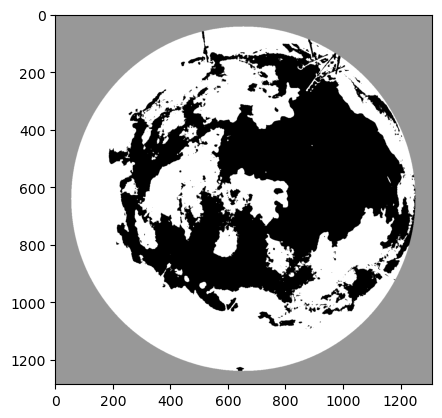

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image
image = cv2.imread('./cloud_images/original/2021_11_26__13_15_00_crop.jpg')

# Remove noise using median blur
image = cv2.GaussianBlur(image,(5,5),0)

# Convert to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Enhance contrast using histogram equalization
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

# crop mask image 
crop_mask = cv2.imread('./crop_mask3.png')

# rbr
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])
mask_red = cv2.inRange(hsv, lower_red, upper_red)

lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

red_pixels = np.count_nonzero(mask_red)
blue_pixels = np.count_nonzero(mask_blue)
ratio = red_pixels / blue_pixels
print(ratio)
if ratio > 0.85:
    # Clouds are more red
    mask = mask_red
else:
    # Clouds are more blue
    mask = mask_blue

gray_3_channel = cv2.merge((mask, mask, mask))
new_img_mask = cv2.bitwise_or(crop_mask,gray_3_channel)
new_img_mask_gray = cv2.cvtColor(new_img_mask, cv2.COLOR_RGB2GRAY)
ret, otsu2 = cv2.threshold(new_img_mask_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
crop_gray = cv2.cvtColor(crop_mask, cv2.COLOR_RGB2GRAY)
new2 = crop_gray+otsu2

cloud_pixels = np.count_nonzero(new2)
total_pixels = new2.shape[0] * new2.shape[1]
cloud_cover = cloud_pixels / total_pixels

print(cloud_cover*100)

plt.imshow(new2,cmap='gray')

In [15]:
gray_sum = np.sum(new2==152)
white_sum = np.sum(new2==255)
black_sum = np.sum(new2==0)

In [16]:
total = white_sum+black_sum
cloud_pixel = (white_sum/total)*100
print(cloud_pixel)

57.85469807768485


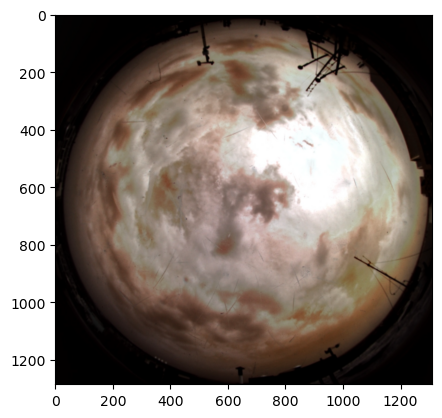

In [17]:
plt.imshow(image)

In [20]:
image2 = cv2.imread('./cloud_images/mask2/2021_11_26__13_15_00_mask2.jpg')
gray_sum2 = np.sum(image2==152)
white_sum2 = np.sum(image2==255)
black_sum2 = np.sum(image2==0)

total2 = white_sum2+black_sum2
cloud_pixel2 = (white_sum2/total2)*100
print(cloud_pixel2)

71.75450463163018
